####[컬러데이터셋 생성]
- 컬러 즉, RGB 이미지
- 컬러 이미지

In [53]:
##[1-1] 모듈 로딩 및 데이터 준비
import cv2                             ## 일반적인 포맷의 이미지 처리 모듈
import matplotlib.pyplot as plt
import numpy as np                     ## 이미지 데이터가 저장된 타입관련 모듈
import os                              ##폴더, 파일, 경로 관련 모듈

In [54]:
# 데이터 준비
# 경로 지정
IMG_DIR ='./image/cat_dog/'
COLOR_DIR = './image/color/'
IMG_CSV ='./image/color/cat_dog.csv'

In [55]:
##데이터 파일명
IMG_FILES = os.listdir(IMG_DIR) 
print(f'IMG_FILES => {len(IMG_FILES)}개')


IMG_FILES => 342개


In [56]:
## - 이미지 전처리 설정
COL, ROW = 70, 70 ##COL-가로 ROW-세로

# 이미지로딩

In [57]:
## 이미지 로딩

## CSV 파일 열기
with open(IMG_CSV, mode='a') as csvF:

    for filename in IMG_FILES:
        #경로+파일명
        pathname = IMG_DIR+filename
        # print(pathname)

        # break#확인용
        # 이미지 데이터 가져오기
        imgDT=cv2.imread(pathname) #기본값이 컬러
        print(imgDT.shape)
        # print(imgDT)
        # plt.imshow(imgDT,cmap='gray') 
        

        ##이미지전처리 =>회색을 이미함

        #이미지 전처리 => 크기통일
        resizeData = cv2.resize(imgDT, (COL, ROW))
        isSave = cv2.imwrite(COLOR_DIR+"color_"+filename, resizeData)
        if not isSave:print(f'{filename}저장실패', COLOR_DIR+"color_"+filename)
        print(resizeData.shape)

        # # 이진화 과정 : 판단 후 사용
        # ret, thresh_cv = cv2.threshold(resizeData, -1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #OTSU가 자동으로 찾아줌
        # plt.imshow(thresh_cv, cmap='gray')
        # print(ret)

        ##csv파일에 쓰기 => 타겟-피쳐
        target = filename[:3]
        b,g,r=cv2.split(resizeData)
        print(b.shape, g.shape, r.shape)
        
        ##채널 분리한거 연결시켜야함
        r,g,b = r.reshape(-1), g.reshape(-1), b.reshape(-1)
        feature = np.concatenate((r,g,b))
        print(feature.shape)
    
        csvfeature=",".join(list(map(str,feature)))

      
        csvF.write(target+',')
        csvF.write(csvfeature+'\n')
   

(683, 1024, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(1600, 2400, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(198, 254, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(768, 1024, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(194, 259, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(183, 275, 3)
(70, 70, 3)
(70, 70) (70, 70) (70, 70)
(14700,)
(201

In [74]:
## 이미지 데이터 증강 
def augmentation():

    with open(IMG_CSV, mode='a') as csvF:

        for filename in IMG_FILES:
            # 경로+파일명
            pathname=IMG_DIR+filename

            # 이미지 데이터 가져오기
            imgData=cv2.imread(pathname, cv2.IMREAD_GRAYSCALE)

            ## 이미지 전처리 => 크기 통일 
            resizeData =cv2.resize(imgData, (COL, ROW))
    

            # flip
            optionList = [ -1, 0, 1 ]
            target  = filename[:3]   
            for idx, option in enumerate(optionList):
                flipIMG=cv2.flip(resizeData, option)
                feature = flipIMG.reshape(-1)
                csvfeature = ",".join(  list(map(str, feature))  )
                csvF.write(target+',')
                csvF.write(csvfeature+'\n')

            # rotation
            H, W = resizeData.shape
            angles = range(0,361,60)
            for idx, angle in enumerate(angles):
                N_FILE = f'{COLOR_DIR}rot{angle:03}_g_{filename}'
                angleIMG=cv2.warpAffine(resizeData, cv2.getRotationMatrix2D((W/2, H/2), angle, 1.0), (W,H))
                feature = angleIMG.reshape(-1)
                csvfeature = ",".join(  list(map(str, feature))  )
                csvF.write(target+',')
                csvF.write(csvfeature+'\n')

In [75]:
# 증강진행
augmentation()

In [58]:
data = np.array([[2,3,4,1,2],[6,7,8,9,0]])
data=data.reshape(-1) # 1차원으로 펴기~
#문자가 아니어서 문자형으로 바꿔야함

In [59]:
## 내장함수 map()써서 문자열 만들기~
",".join(list(map(str,data)))

'2,3,4,1,2,6,7,8,9,0'

[3] 생성된 이미지 데이터셋 파일 체크

In [60]:
## 모듈로딩
import pandas as pd

In [61]:
## 이미지 데이터 셋 로딩
imgDF = pd.read_csv(IMG_CSV, header=None)
imgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Columns: 14701 entries, 0 to 14700
dtypes: int64(14700), object(1)
memory usage: 38.4+ MB


In [62]:
## 실제 raw 데이터 확인
imgDF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,14691,14692,14693,14694,14695,14696,14697,14698,14699,14700
0,cat,252,246,255,252,238,246,247,235,246,...,30,39,49,59,63,58,53,56,61,67
1,cat,43,39,44,42,42,47,54,55,42,...,15,15,15,15,14,13,17,15,15,16


In [63]:
## 0번행 추출 
imgSR=imgDF.iloc[0]
imgSR
### 타겟(라벨)(cat)이 붙어나옴

0        cat
1        252
2        246
3        255
4        252
        ... 
14696     58
14697     53
14698     56
14699     61
14700     67
Name: 0, Length: 14701, dtype: object

In [64]:
## - 행에서 라벨/타겟과 피쳐 분리
label = imgSR[0]            ### 리사이징
img = imgSR[1:].astype(int)         

label, img.shape, img.dtype                 ### int로 바뀌어 있는지 확인

('cat', (14700,), dtype('int64'))

In [68]:
## 이미지 raw 데이터의 이미지 출력 위해서 3차원 만들어줘야함
# img=img.values.reshape(COL, ROW, 3) ## 머지해서 모우면 됌

PIXELS = COL*ROW
r, g, b = img.values[:PIXELS], img.values[PIXELS:PIXELS*2], img.values[PIXELS*2:]

# r = img.values[:PIXELS].reshape(COL, ROW)
# g = img.values[PIXELS:PIXELS*2].reshape(COL, ROW)
# b = img.values[PIXELS*2:PIXELS*3].reshape(COL, ROW)


r, g, b = r.reshape(COL,ROW), g.reshape(COL,ROW) , b.reshape(COL,ROW)

print(r.shape, g.shape, b.shape)


(70, 70) (70, 70) (70, 70)


In [69]:
# 체널 합치기
imgData = cv2.merge((r,g,b))
print(imgData.shape)

(70, 70, 3)


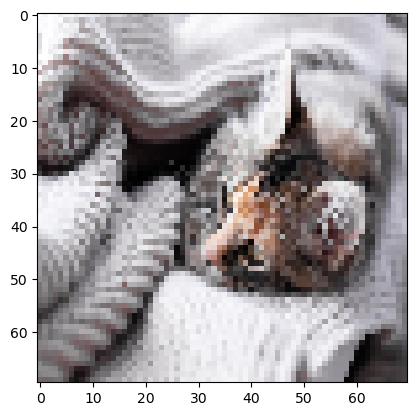

In [70]:
## 시각화
plt.imshow(imgData)
#plt.title(label)
plt.show()